## Import Library

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Making Dummy Data

In [4]:
np.random.seed(42)

# daftar subjek
subjects = [
    "Pendidikan Agama", "Pendidikan Pancasila", "Bahasa Inggris", "Bahasa Mandarin",
    "Matematika (Umum)", "Biologi", "Fisika", "Kimia", "Geografi", "Sejarah",
    "Sosiologi", "Ekonomi", "Pendidikan Jasmani, Olahraga, dan Kesehatan",
    "Informatika", "Seni Musik", "Bahasa Indonesia"
]

# students yang bakal di generate
n_students = 1000

# Simulasi semester sekarang
low_count = int(0.2 * n_students)
mid_count = int(0.5 * n_students)
high_count = n_students - low_count - mid_count

low_avg = np.random.normal(loc=60, scale=5, size=low_count)
mid_avg = np.random.normal(loc=75, scale=5, size=mid_count)
high_avg = np.random.normal(loc=90, scale=5, size=high_count)

base_averages = np.concatenate([low_avg, mid_avg, high_avg])
base_averages = np.clip(base_averages, 0, 100)

# Simulasi skor subjek per murid
grades_current = np.array([
    base + np.random.normal(loc=0, scale=5, size=len(subjects))
    for base in base_averages
])
grades_current = np.clip(grades_current, 0, 100)

# dataframe
df = pd.DataFrame(grades_current, columns=subjects)
df['Rata-rata'] = df.mean(axis=1)

# Mask
low_mask = df['Rata-rata'] < 70
mid_mask = (df['Rata-rata'] >= 70) & (df['Rata-rata'] < 85)
high_mask = df['Rata-rata'] >= 85


df_next_sem = df[subjects].copy()

def add_noise(data, loc=0, scale=5):
    return np.clip(data + np.random.normal(loc=loc, scale=scale, size=data.shape), 0, 100)

# Low performers
indices = df[low_mask].index.to_numpy()
np.random.shuffle(indices)
n = len(indices)
df_next_sem.loc[indices[:int(0.7 * n)]] = add_noise(df_next_sem.loc[indices[:int(0.7 * n)]], loc=5, scale=4)
df_next_sem.loc[indices[int(0.7 * n):int(0.9 * n)]] = add_noise(df_next_sem.loc[indices[int(0.7 * n):int(0.9 * n)]], loc=0, scale=3)
df_next_sem.loc[indices[int(0.9 * n):]] = add_noise(df_next_sem.loc[indices[int(0.9 * n):]], loc=15, scale=5)

# Mid performers
indices = df[mid_mask].index.to_numpy()
np.random.shuffle(indices)
n = len(indices)
df_next_sem.loc[indices[:int(0.6 * n)]] = add_noise(df_next_sem.loc[indices[:int(0.6 * n)]], loc=0, scale=3)
df_next_sem.loc[indices[int(0.6 * n):int(0.9 * n)]] = add_noise(df_next_sem.loc[indices[int(0.6 * n):int(0.9 * n)]], loc=5, scale=4)
df_next_sem.loc[indices[int(0.9 * n):]] = add_noise(df_next_sem.loc[indices[int(0.9 * n):]], loc=-7, scale=5)

# High performers
indices = df[high_mask].index.to_numpy()
np.random.shuffle(indices)
n = len(indices)
df_next_sem.loc[indices[:int(0.8 * n)]] = add_noise(df_next_sem.loc[indices[:int(0.8 * n)]], loc=-3, scale=3)
df_next_sem.loc[indices[int(0.8 * n):]] = add_noise(df_next_sem.loc[indices[int(0.8 * n):]], loc=0, scale=2)

# pembulatan dan pergantian nama df
df_next_sem = df_next_sem.round().astype(int)
df_next_sem.columns = [col + " (Next Sem)" for col in df_next_sem.columns]

# kombinasi
df_final = pd.concat([df, df_next_sem], axis=1)
df_final['Rata-rata (Next Sem)'] = df_next_sem.mean(axis=1).round(2)


print(df_final.head())

   Pendidikan Agama  Pendidikan Pancasila  Bahasa Inggris  Bahasa Mandarin  \
0         69.480348             67.106739       62.781723        59.248887   
1         56.051588             56.889249       57.706942        61.429508   
2         65.234558             66.474422       60.822510        71.108377   
3         74.997851             74.515606       64.487336        69.594167   
4         57.017028             53.230884       52.355826        64.633367   

   Matematika (Umum)    Biologi     Fisika      Kimia   Geografi    Sejarah  \
0          65.974687  64.450998  66.959537  65.659430  67.731334  59.807395   
1          61.922856  56.440178  59.186906  70.020030  67.946394  61.490297   
2          57.109614  55.916568  64.360702  68.473934  71.658081  60.944021   
3          70.085300  68.918518  64.863624  64.257032  67.487379  73.478794   
4          56.490727  60.561753  58.594630  61.214437  59.213343  52.414272   

   ...  Kimia (Next Sem)  Geografi (Next Sem)  Sejarah (

In [6]:
df_final.info()
df_final.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 34 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Pendidikan Agama                                        1000 non-null   float64
 1   Pendidikan Pancasila                                    1000 non-null   float64
 2   Bahasa Inggris                                          1000 non-null   float64
 3   Bahasa Mandarin                                         1000 non-null   float64
 4   Matematika (Umum)                                       1000 non-null   float64
 5   Biologi                                                 1000 non-null   float64
 6   Fisika                                                  1000 non-null   float64
 7   Kimia                                                   1000 non-null   float64
 8   Geografi                               

,Pendidikan Agama,Pendidikan Pancasila,Bahasa Inggris,Bahasa Mandarin,Matematika (Umum),Biologi,Fisika,Kimia,Geografi,Sejarah,...,Kimia (Next Sem),Geografi (Next Sem),Sejarah (Next Sem),Sosiologi (Next Sem),Ekonomi (Next Sem),"Pendidikan Jasmani, Olahraga, dan Kesehatan (Next Sem)",Informatika (Next Sem),Seni Musik (Next Sem),Bahasa Indonesia (Next Sem),Rata-rata (Next Sem)
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,76.503308,76.586615,76.377113,76.497016,76.663748,76.378808,76.507123,76.588379,76.461995,76.309648,...,77.56000,77.547000,77.341000,77.254000,77.660000,77.89400,77.811000,77.577000,77.544000,77.599250
std,12.760839,12.855120,12.851008,12.516120,12.559012,12.274318,12.642208,12.458398,12.585651,12.687172,...,11.47057,11.394719,11.329301,11.517558,11.211873,11.55631,11.637556,11.613654,11.361476,9.813319
min,35.841965,40.886540,38.386987,45.152996,44.755052,42.754046,38.910653,41.895316,40.867938,38.230371,...,44.00000,39.000000,42.000000,38.000000,41.000000,43.00000,41.000000,45.000000,47.000000,47.000000
25%,68.093481,67.604886,67.386229,67.994852,68.020930,68.058564,67.455542,68.040596,67.525184,67.907115,...,70.00000,70.000000,70.000000,69.000000,70.000000,70.00000,70.000000,70.000000,69.000000,71.045000
50%,76.894382,76.400600,76.357493,76.633566,76.365946,76.034302,76.580535,76.914998,76.751110,76.218738,...,78.00000,78.000000,78.000000,78.000000,79.000000,78.00000,78.000000,78.000000,78.000000,77.410000
75%,85.890102,86.411040,86.132134,85.885931,86.143741,85.476901,86.213025,85.786236,85.708600,85.826556,...,86.00000,86.000000,86.000000,86.000000,86.000000,87.00000,86.000000,87.000000,86.000000,85.380000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.00000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,98.000000


In [9]:
df_final['performance'] = df_final['Rata-rata'].apply(
    lambda x: 'low performer' if x < 70 else (
        'average performer' if 70 <= x < 85 else 'high performer'
    )
)


In [11]:
df_final.info()
df_final['performance'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 35 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Pendidikan Agama                                        1000 non-null   float64
 1   Pendidikan Pancasila                                    1000 non-null   float64
 2   Bahasa Inggris                                          1000 non-null   float64
 3   Bahasa Mandarin                                         1000 non-null   float64
 4   Matematika (Umum)                                       1000 non-null   float64
 5   Biologi                                                 1000 non-null   float64
 6   Fisika                                                  1000 non-null   float64
 7   Kimia                                                   1000 non-null   float64
 8   Geografi                               

performance
average performer    455
low performer        273
high performer       272
Name: count, dtype: int64

In [12]:
conditions = [
    df_final['Rata-rata'] > df_final['Rata-rata (Next Sem)'],
    df_final['Rata-rata'] < df_final['Rata-rata (Next Sem)'],
    df_final['Rata-rata'] == df_final['Rata-rata (Next Sem)']
]

choices = [
    'decreased performance',
    'increased decrease',
    'stable performance'
]

df_final['performance_final'] = np.select(conditions, choices)

In [14]:
df_final.info()
df_final['performance_final'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 36 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Pendidikan Agama                                        1000 non-null   float64
 1   Pendidikan Pancasila                                    1000 non-null   float64
 2   Bahasa Inggris                                          1000 non-null   float64
 3   Bahasa Mandarin                                         1000 non-null   float64
 4   Matematika (Umum)                                       1000 non-null   float64
 5   Biologi                                                 1000 non-null   float64
 6   Fisika                                                  1000 non-null   float64
 7   Kimia                                                   1000 non-null   float64
 8   Geografi                               

performance_final
increased decrease       548
decreased performance    452
Name: count, dtype: int64

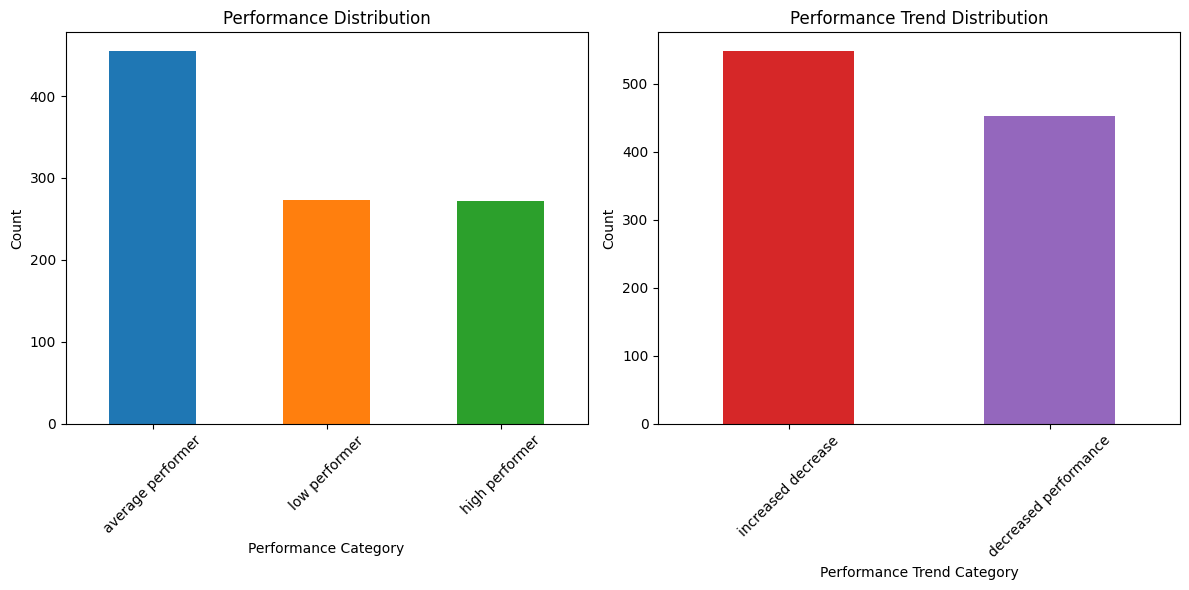

In [15]:

import matplotlib.pyplot as plt

# Set up the figure
plt.figure(figsize=(12, 6))

# First subplot - performance distribution
plt.subplot(1, 2, 1)
df_final['performance'].value_counts().plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Performance Distribution')
plt.xlabel('Performance Category')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Second subplot - performance_final distribution
plt.subplot(1, 2, 2)
df_final['performance_final'].value_counts().plot(kind='bar', color=['#d62728', '#9467bd', '#8c564b'])
plt.title('Performance Trend Distribution')
plt.xlabel('Performance Trend Category')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [5]:
df_final.to_csv('daftar_nilai_revised.csv', index=False)

## Tambah Kasus yang bervariasi
_Tambah siswa dengan nilai sangat rendah,etc.

## Tambah Kolom Absensi

## Hapus Kolom Tidak Digunakan

## Splitting Data

# 🧠 Feature Engineering

## Hitung Nilai Rata-rata per Siswa

## Normalisasi Nilai

## Tambah Fitur Tren Peningkatan/Penurunan Nilai

## Tambah Fitur Statistik

# 🏗️ Model Development (Compliance Focus)

## Bangun Model TensorFlow (tanpa API luar)

## PCA (jika diperlukan)

## Cross Validation

## Simpan Model

# 🧪 Evaluation

## Evaluasi dengan MAE, RMSE, R²

## Visualisasi Prediksi vs Nilai Asli

# 🚀 Inference & Integration

## Kode Inference Sederhana

## Integrasi ke UI atau API